listing ID - идентификатор отеля 
name - название отеля
host_id - идентификатор хоста
host_name - имя владельца
neighbourhood_group - район (когда город делим на разные районы: Manhattan, Brooklyn и т.д..)
neighbourhood - область района
latitude - координаты широты (в градусах)
longitude - координаты долготы (в градусах)
room_type - тип комнаты (целый дом или апартаменты, комната)
price - цена (в долларах)
minimum_nights - кол-во минимальных ночей для бронирования
number_of_reviews - количество отзывов
last_review - последний отзыв
reviews_per_month - количество отзывов в месяц
calculated_host_listings_count - кол-во объявления отеля
availability_365 - кол-во доступных дней в году					

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
data = pd.read_csv('AB_NYC_2019.csv', index_col = 0, delimiter = ',')
data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#у нас есть колонка с последним визитом - переводм ее в дату
data['last_review'] = pd.to_datetime(data['last_review'])

In [4]:
#данные о таблице: название колонки, количество непустых значений и тип элемента в таличке
data.info()
#object - string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48879 non-null  object        
 1   host_id                         48895 non-null  int64         
 2   host_name                       48874 non-null  object        
 3   neighbourhood_group             48895 non-null  object        
 4   neighbourhood                   48895 non-null  object        
 5   latitude                        48895 non-null  float64       
 6   longitude                       48895 non-null  float64       
 7   room_type                       48895 non-null  object        
 8   price                           48895 non-null  int64         
 9   minimum_nights                  48895 non-null  int64         
 10  number_of_reviews               48895 non-null  int64         
 

In [5]:
#количество пустых ячеек
display(data.isna().sum())
display(sum(data.isnull().values.ravel()))

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

20141

In [6]:
#добавим строку с описанием переменных (тип переменной: количественная (непрерывная/дискретная), категориальная (номинальная/порядковая/бинарная))
city_omsk = {'Город':'Омск','Дата основания':'1716','Площадь':'573','Население':'1,2'}

In [7]:
type_p = {'id': 'Непрерывная', 'name': 'Номинальные', 'host_name': 'Номинальные', 'host_id': 'Непрерывная', 'neighbourhood_group': 'Номинальная', 'neighbourhood': 'Номинальная', "availability_365": 'Дискретные', 'calculated_host_listings_count': 'Дискретные', 'latitude': 'Дискретные', 'longitude': 'Дискретные', 'price' : 'Непрерывные', 'minimum_nights' : 'Непрерывные', 'last_review': 'Непрерывная', 'reviews_per_month' : 'Непрерывная', 'number_of_reviews' : 'Непрерывные', 'room_type': 'Номинальные'}
for key, val in type_p.items():
    print(key, ': \t', val)

id : 	 Непрерывная
name : 	 Номинальные
host_name : 	 Номинальные
host_id : 	 Непрерывная
neighbourhood_group : 	 Номинальная
neighbourhood : 	 Номинальная
availability_365 : 	 Дискретные
calculated_host_listings_count : 	 Дискретные
latitude : 	 Дискретные
longitude : 	 Дискретные
price : 	 Непрерывные
minimum_nights : 	 Непрерывные
last_review : 	 Непрерывная
reviews_per_month : 	 Непрерывная
number_of_reviews : 	 Непрерывные
room_type : 	 Номинальные


#построить частотную таблицу с двумя категориями - квартирой/домом и отдельной комнатой


In [8]:
data.groupby("room_type")["neighbourhood_group"].value_counts()

room_type        neighbourhood_group
Entire home/apt  Manhattan              13199
                 Brooklyn                9559
                 Queens                  2096
                 Bronx                    379
                 Staten Island            176
Private room     Brooklyn               10132
                 Manhattan               7982
                 Queens                  3372
                 Bronx                    652
                 Staten Island            188
Shared room      Manhattan                480
                 Brooklyn                 413
                 Queens                   198
                 Bronx                     60
                 Staten Island              9
Name: neighbourhood_group, dtype: int64

In [8]:
import seaborn as sns

распределение цен

In [22]:
data['price'].mean()

152.7206871868289

<AxesSubplot:xlabel='price', ylabel='Density'>

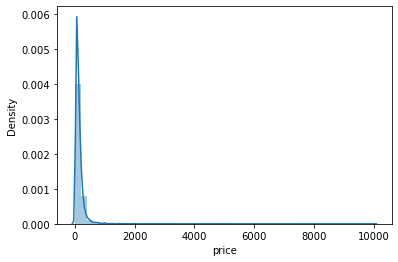

In [11]:
sns.distplot(data.price.dropna())

TypeError: 'AxesSubplot' object is not subscriptable

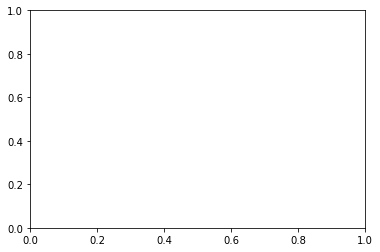

In [3]:
fig, axs = plt.subplots(1, 1)
n_bins = len(data)
axs[0].hist(data.groupby("room_type")["neighbourhood_group"].value_counts())
axs[0].hist(data['sepal length (cm)'], bins=n_bins)
axs[0].set_title('sepal length')
axs[1].hist(data['petal length (cm)'], bins=n_bins)
axs[1].set_title('petal length')

In [9]:
data.sort_values(by=[ 'last_review', 'number_of_reviews'], ascending = [False, False])

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337
22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,2019-07-08,17.82,3,25
1843108,HappyCozy GuestSuite w/ Great Energy close to JFK,2021121,Megan,Brooklyn,Cypress Hills,40.67840,-73.89362,Entire home/apt,125,1,319,2019-07-08,8.52,1,357
13355002,Newly renovated apt w/parking space,75730551,Jeffrey,Brooklyn,Canarsie,40.63672,-73.91154,Entire home/apt,120,2,193,2019-07-08,5.14,1,254
19734492,Beautiful Modern Brooklyn Gem,137184002,Kevin,Brooklyn,East Flatbush,40.65430,-73.91488,Entire home/apt,85,1,183,2019-07-08,7.65,1,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27


In [10]:
#создадим новый столбец coordinat: объеденим записи по широте и долготе
data["latitude"] = data["latitude"].astype(str)
data["longitude"] = data["longitude"].astype(str)
data["coordinates"] = (data["latitude"]) + ", " +  (data["longitude"])
display(data.head())

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,coordinates
id,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,"40.64749, -73.97237"
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,"40.75362, -73.98377"
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,NaT,NaN,1,365,"40.80902, -73.9419"
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,"40.68514, -73.95976"
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,"40.79851, -73.94399"


#рассчитаем среднюю цену жилья и посмотрим насколько много свободных минимум 200 дней в год дешевего жилья

In [27]:
aver = data["price"].mean()
display(sorted(data[(data["price"] <= aver) & (data["availability_365"] >= 200)][['price', "availability_365"]]))
display(data[(data["price"] <= aver) & (data["availability_365"] >= 200)].transpose().loc[['price', "availability_365"]])

['availability_365', 'price']

id,2539,3647,5178,5803,6021,8024,8025,8110,8490,9518,...,36455321,36455649,36456548,36457832,36458668,36473044,36473253,36481315,36482416,36482809
price,149,150,79,89,85,130,80,110,120,44,...,34,35,150,85,68,25,25,120,75,75
availability_365,365,365,220,314,333,347,364,304,233,311,...,320,341,267,300,362,338,365,365,364,353


#Построим сводные таблицы: 1) Средняя цена по типу комнаты(это даст возможность оценить как сильно различаются разные виды жилья)  


In [18]:
display(data.groupby('room_type')[['price']].mean().sort_values('price'))

,price
room_type,
Shared room,70.127586
Private room,89.780973
Entire home/apt,211.794246


In [17]:
#Построим сводные таблицы: 2) Средняя цена по району(это даст возможность оценить их элитность)  
display(data.groupby('neighbourhood')[['price']].mean().sort_values('price'))
data.groupby('neighbourhood_group')[['price']].mean().sort_values('price')

,price
neighbourhood,
Bull's Head,47.333333
Hunts Point,50.500000
Tremont,51.545455
Soundview,53.466667
New Dorp,57.000000
...,...
Riverdale,442.090909
Sea Gate,487.857143
Tribeca,490.638418


,price
neighbourhood_group,
Bronx,87.496792
Queens,99.517649
Staten Island,114.812332
Brooklyn,124.383207
Manhattan,196.875814


In [21]:
data.groupby("neighbourhood_group")["room_type"].value_counts()#платная или нет группировка

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

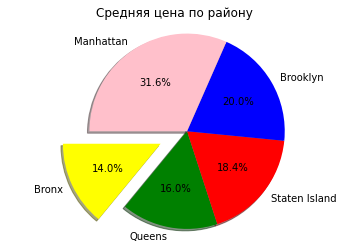

In [15]:
labels = ['Bronx','Queens','Staten Island','Brooklyn', 'Manhattan' ]
values = [87.496792,99.517649,114.812332,124.383207, 196.875814]
colors = ['yellow','green','red','blue', 'pink']
explode = [0.3,0,0,0, 0]
plt.title('Средняя цена по району')
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

In [20]:
#Построим сводные таблицы: 3) Среднее количество отзывов по типу комнаты(это показывает, что чем ниже цена тем выше количество отзывов)  
display(data.groupby('room_type')[['reviews_per_month', 'price']].mean().sort_values('reviews_per_month'))

,reviews_per_month,price
room_type,,
Entire home/apt,1.306578,211.794246
Private room,1.445209,89.780973
Shared room,1.471726,70.127586


import pandas as pd

index = np.arange(5)
data = {'series1': [1,3,4,3,5],
        'series2': [2,4,5,2,4],
        'series3': [3,2,3,1,3]}
df = pd.DataFrame(data)
df.plot(kind='bar')
plt.show()

In [62]:
import pandas as pd
#гипотеза 5 не подтвердилась, ведь максимальное количество отзывов не у того отеля, которому оставили последний отзыв

display('максимальное количетсво отызвов', data['number_of_reviews'].max())
display('Отель, у которого максимальное количество отзывов',  data[data['number_of_reviews'].max() == data['number_of_reviews']][['number_of_reviews', 'last_review']])
display('Отель, у которого последний отзыв')
data_copy = data
data_copy = data_copy.dropna()
display(data_copy[['number_of_reviews', 'last_review']][::-1].head())

'максимальное количетсво отызвов'

629

'Отель, у которого максимальное количество отзывов'

,number_of_reviews,last_review
id,,
9145202,629,2019-07-05


'Отель, у которого последний отзыв'

,number_of_reviews,last_review
id,,
36455809,1,2019-07-08
36442252,2,2019-07-07
36438336,1,2019-07-07
36427429,1,2019-07-07
36425863,1,2019-07-07


In [21]:
#Подсчет корреляции
data.corr()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
price,0.015309,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.017364,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.140106,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.296417,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.154950,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.203492,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [28]:
display('Средняя цена квартиры, где мин кол-во дней для бронирования = 1')
rslt_df = data[data['minimum_nights'] == 1]
display(rslt_df['price'].mean())

display('Средняя цена квартиры, где мин кол-во дней для бронирования > 1 ')
rslt_df = data[data['minimum_nights'] > 1]
display(rslt_df['price'].mean())

display('Средняя цена квартиры без учета кол-во дней для бронирования')
display(data['price'].mean())

'Средняя цена квартиры, где мин кол-во дней для бронирования = 1'

142.02287735849058

'Средняя цена квартиры, где мин кол-во дней для бронирования > 1 '

156.48229440221147

'Средняя цена квартиры без учета кол-во дней для бронирования'

152.7206871868289

In [41]:
rslt_df = data[data['neighbourhood_group'] == "Manhattan"]
aver = rslt_df['availability_365'].mean()
display('Средняя цена', rslt_df['price'].mean())
display('Среднее количество дней бронирования', rslt_df['availability_365'].mean())

display('Средняя цена квартиры, где мин кол-во дней для бронирования > среднего значения ')
#rslt_df = data[data['neighbourhood_group'] == "Manhattan" & data['price'] > aver]
rslt_df1 = rslt_df[rslt_df['availability_365'] > aver]
display(rslt_df1['price'].mean())

display('Средняя цена квартиры, где кол-во дней для бронирования < среднего значения')
rslt_df1 = rslt_df[rslt_df['availability_365'] < aver]
display(data['price'].mean())

'Средняя цена'

196.8758136743456

'Среднее количество дней бронирования'

111.97940999953835

'Средняя цена квартиры, где мин кол-во дней для бронирования > среднего значения '

236.32701593433123

'Средняя цена квартиры, где кол-во дней для бронирования < среднего значения'

152.7206871868289

In [42]:
rslt_df = data[data['neighbourhood_group'] == "Brooklyn"]
aver = rslt_df['availability_365'].mean()
display('Средняя цена', rslt_df['price'].mean())
display('Среднее количество дней бронирования', rslt_df['availability_365'].mean())

display('Средняя цена квартиры, где мин кол-во дней для бронирования > среднего значения ')
#rslt_df = data[data['neighbourhood_group'] == "Manhattan" & data['price'] > aver]
rslt_df1 = rslt_df[rslt_df['availability_365'] > aver]
display(rslt_df1['price'].mean())

display('Средняя цена квартиры, где кол-во дней для бронирования < среднего значения')
rslt_df1 = rslt_df[rslt_df['availability_365'] < aver]
display(data['price'].mean())

'Средняя цена'

124.38320732192598

'Среднее количество дней бронирования'

100.23229208117787

'Средняя цена квартиры, где мин кол-во дней для бронирования > среднего значения '

138.46305065289138

'Средняя цена квартиры, где кол-во дней для бронирования < среднего значения'

152.7206871868289

Используя эти данные можно проверить несколько гипотез 
1. А. Чем выше стоимость - тем больше отзывов. 
    Б. Чем больше количество отзывов - тем меньше свободных для бронирования дней в году. 
2. чем больше объявлений - тем больше отзывов - тем больше разных комнат в одном отеле. 
3. Чем меньше минимальных для бронирования ночей - тем выше стоимость за ночь. Правда ли, что жилье на один вечер более дорогое. 
4. Чем ниже стоимость в крутом районе (Манхеттан) - тем меньше доступных для бронирования дней. И то же самое про Бруклин: тем выше стоимость за ночь (в Бруклине) - тем меньше кол-во доступных для бронирования ночей. 



1. Корреляция в обоих случаях не превосходит 0.18, так что ни то ни другое не подтвердилось.
2. Опять же - корреляция не превосходит 0.23
3. Та же ситуация что и в первых двух - корреляция ниже 0.05


In [23]:
# Для проверки 4 гипотезы построим сводную таблицу
data.groupby('neighbourhood_group')[['price', 'availability_365']].mean().sort_values('price')
# Как видно, прослеживается некоторая связь доступности и средней цены в районе. Самое доступное жилье средней цены, но видно что более дорогие районы более загружены чем менее

,price,availability_365
neighbourhood_group,,
Bronx,87.496792,165.758937
Queens,99.517649,144.451818
Staten Island,114.812332,199.678284
Brooklyn,124.383207,100.232292
Manhattan,196.875814,111.979410


AttributeError: 'DataFrame' object has no attribute 'prime_genre'

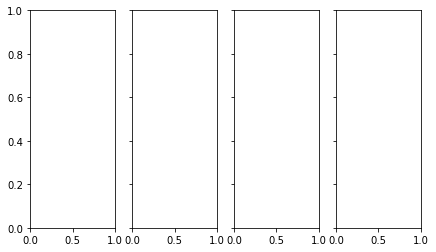

In [20]:
#сначала приведем несколько графиков, которые будут демонстрировать цену в разных районах Нью-Йорка
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(7, 4))

ax[0].barh(data.prime_genre, data.rating_count_tot)
ax[0].set(ylabel='Категории приложений', xlabel = 'rating_count_tot', xlim = [0, 200000])

ax[1].barh(data.prime_genre, data.rating_count_ver)
ax[1].set(xlabel = 'rating_count_ver', xlim = [0, 11000])

ax[2].barh(data.prime_genre, data.user_rating)
ax[2].set(xlabel = 'user_rating', xlim = [0, 5])

ax[3].barh(data.prime_genre, data.user_rating_ver)
ax[3].set(xlabel = 'user_rating_ver', xlim = [0, 5])
fig.suptitle('Анализ рейтинга по категориям', fontsize=14, fontweight='bold');

<AxesSubplot:xlabel='reviews_per_month', ylabel='calculated_host_listings_count'>

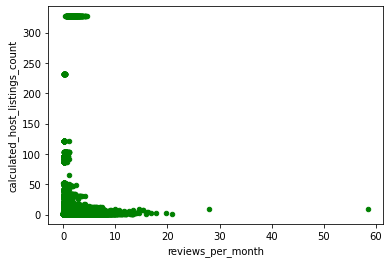

In [25]:
data.plot(x='reviews_per_month', y='calculated_host_listings_count', kind = 'scatter', color= 'g')

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

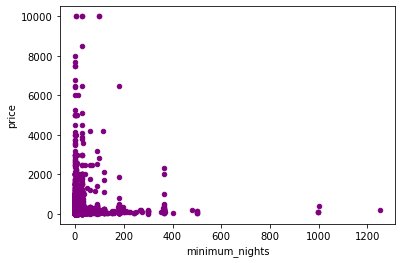

In [31]:
data.plot(x='minimum_nights', y='price', kind = 'scatter', color= 'purple')